In [30]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import linear_model, grid_search
import matplotlib.pyplot as plt
%matplotlib inline

/Users/daichi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/daichi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
X = np.linspace(-10, 10, 20)
Y = 0.001 * (X*X*X + X*X + X) + np.random.normal(0, 0.1, len(X))
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X[:, np.newaxis])

In [35]:
parameters_1 = {'alpha' : np.logspace(-3, 1, 100)}
parameters_2 = {'alpha' : np.logspace(1, 4, 100)}
parameters_3 = {'alpha' : np.logspace(-3, 1, 100), 'L1_ratio' : np.logspace(-1, 0, 10)}

In [41]:
model_l1 = grid_search.GridSearchCV(linear_model.LassoLars(), parameters_1, cv=10)
model_l1.fit(X_poly, Y)
print("Lasso Regression:")
print(model_l1.best_params_)
print(model_l1.best_estimator_.coef_)

Lasso Regression:
{'alpha': 0.0023101297000831605}
[ 0.00000000e+00  2.20596081e-02  0.00000000e+00  6.04191432e-04
  0.00000000e+00  1.56005736e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.33266229e-13]


In [42]:
model_l2 = grid_search.GridSearchCV(linear_model.Ridge(), parameters_2, cv=10)
model_l2.fit(X_poly, Y)
print("Redge Regression: ")
print(model_l2.best_params_)
print(model_l2.best_estimator_.coef_)

Redge Regression: 
{'alpha': 932.60334688322}
[ 0.00000000e+00  5.93467562e-04 -6.69251013e-04  2.79907057e-03
 -5.10381865e-05 -7.44302943e-05  6.89317324e-06  1.04270033e-06
 -1.30680435e-07 -4.79494126e-09  6.73385863e-10]


In [43]:
xs = np.linspace(-10, 10, 200)
Y_predict_1 = model_l1.predict(poly.fit_transform(xs[:, np.newaxis]))
Y_predict_2 = model_l2.predict(poly.fit_transform(xs[:, np.newaxis]))

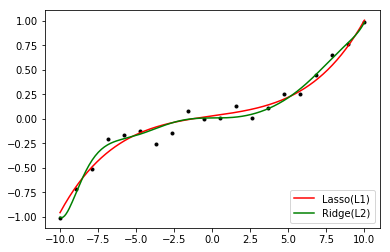

In [46]:
plt.plot(X, Y, ".", color="k")
plt.plot(xs, Y_predict_1, '-', color='r', label='Lasso(L1)')
plt.plot(xs, Y_predict_2, '-', color='g', label='Ridge(L2)')
plt.legend(loc='lower right')
plt.show()